In [1]:
import numpy as np
from qtt.simulation.classicaldotsystem import ClassicalDotSystem, TripleDot

PyQt4 (API v2)


<IPython.core.display.Javascript object>

In [2]:
test_dot = TripleDot()

In [3]:
temp_state = test_dot.calculate_ground_state(np.array([0,0,0]))
temp_state

array([0, 0, 0])

In [4]:
# make a test simulation: zero gate plane (all gate voltages set to zero)
nx = 50
ny = 50
test2Dparams = np.zeros((3,nx,ny))
sweepx = np.linspace(0, 300, nx)
sweepy = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(sweepx, sweepy)
test2Dparams[0] = xv+yv
xv, yv = np.meshgrid(sweepy, sweepx)
test2Dparams[1] = xv+yv

# run the honeycomb simulation
test_dot.simulate_honeycomb(test2Dparams)

simulatehoneycomb: 0/50
simulatehoneycomb: 8/50
simulatehoneycomb: 16/50
simulatehoneycomb: 24/50
simulatehoneycomb: 32/50
simulatehoneycomb: 40/50
simulatehoneycomb: 49/50
simulatehoneycomb: 6.8 [s]


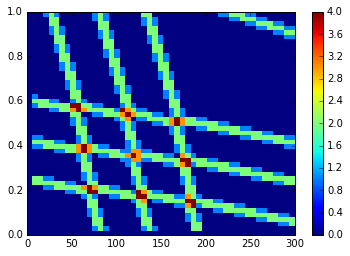

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.pcolor(sweepx,sweepy,test_dot.honeycomb)
plt.colorbar()
plt.show()